# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/nitishsharma01/olympics-124-years-datasettill-2020

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [170]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

winter_olympics = pd.read_csv(r"C:\Users\pcchi\LaunchCode\cleaning-data-checkpoint\olympic_winter_games.csv")
winter_olympics

,Unnamed: 0.1,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,4,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
1,1,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
2,2,6,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
3,3,7,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
4,4,8,Christine Jacoba Aaftink,F,27.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48559,48559,271111,Andrzej ya,M,29.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
48560,48560,271112,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
48561,48561,271113,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
48562,48562,271114,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


In [150]:
winter_olympics.shape

(48564, 14)

In [151]:
winter_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  48564 non-null  int64  
 1   Unnamed: 0    48564 non-null  int64  
 2   Name          48564 non-null  object 
 3   Sex           48564 non-null  object 
 4   Age           48564 non-null  float64
 5   Team          48564 non-null  object 
 6   NOC           48564 non-null  object 
 7   Games         48564 non-null  object 
 8   Year          48564 non-null  int64  
 9   Season        48564 non-null  object 
 10  City          48564 non-null  object 
 11  Sport         48564 non-null  object 
 12  Event         48564 non-null  object 
 13  Medal         48564 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 5.2+ MB


In [152]:
winter_olympics.describe()

,Unnamed: 0.1,Unnamed: 0,Age,Year
count,48564.000000,48564.000000,48564.000000,48564.000000
mean,24281.500000,137838.979059,25.033049,1987.825097
std,14019.363573,77152.638568,4.764356,22.070100
min,0.000000,4.000000,11.000000,1924.000000
25%,12140.750000,73357.750000,22.000000,1972.000000
50%,24281.500000,134752.500000,24.000000,1994.000000
75%,36422.250000,205753.250000,28.000000,2006.000000
max,48563.000000,271115.000000,58.000000,2014.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

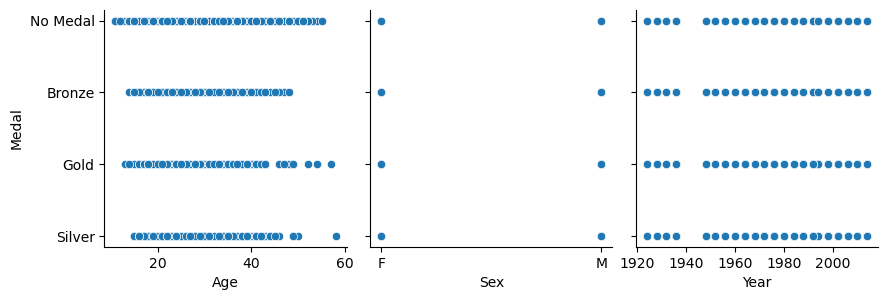

In [153]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(winter_olympics, x_vars=['Age','Sex','Year'], 
             y_vars='Medal', size=3, aspect=1, kind='scatter')
plt.show()

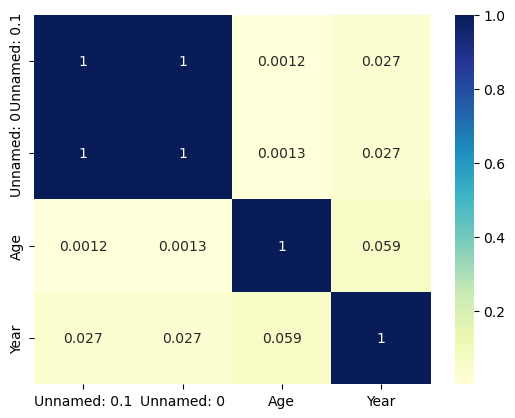

In [154]:
# Visualizing the data using heatmap
sns.heatmap(winter_olympics.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [164]:
# Creating X and y
X = winter_olympics['Age']
y = winter_olympics['Medal']

In [165]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)
# Take a look at the train dataset
X_train

30126    40.0
2260     28.0
45081    28.0
8263     28.0
33848    32.0
         ... 
16304    31.0
79       35.0
12119    27.0
14147    24.0
38408    20.0
Name: Age, Length: 33994, dtype: float64

In [166]:
# Take a look at the train dataset
y_train

30126    No Medal
2260     No Medal
45081    No Medal
8263     No Medal
33848    No Medal
           ...   
16304    No Medal
79           Gold
12119    No Medal
14147    No Medal
38408    No Medal
Name: Medal, Length: 33994, dtype: object

In [167]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
X_train_sm


,const,Age
30126,1.0,40.0
2260,1.0,28.0
45081,1.0,28.0
8263,1.0,28.0
33848,1.0,32.0
...,...,...
16304,1.0,31.0
79,1.0,35.0
12119,1.0,27.0
14147,1.0,24.0


In [171]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Error Terms

Finally, plot your error terms!

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? Not really